# Clustering
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters. Learn more about clustering, types and techniques here on [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/#:~:text=Clustering%20is%20the%20task%20of,and%20assign%20them%20into%20clusters.) article.

## Project: Clustering of CreditCard dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- **CUSTID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases (
- **BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFFPURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTSPURCHASES** : Amount of purchase done in installment
- **CASHADVANCE** : Cash in advance given by the user
- **PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASESTRX** : Numbe of purchase transactions made
- **CREDITLIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **INIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

###  1. Importing the important libraries

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

### 2. Reading the Data

In [3]:
cc = pd.read_csv("CC GENERAL.csv")

### 3. Understanding the Data

In [4]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cc.shape

(8950, 18)

In [6]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Our data has total of 8950 rows and 18 columns. Only one column is categorical while rest are numerical columns.

In [9]:
#detect missing data
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There is one missing value in CREDIT_LIMIT column and 313 missing values in MINIMUM_LIMIT column.

In [10]:
#detect duplicate rows
cc.duplicated().sum()

0

There are no duplicates rows in the dataset.

Text(0.5, 1.0, 'Numerical Features Box Plot')

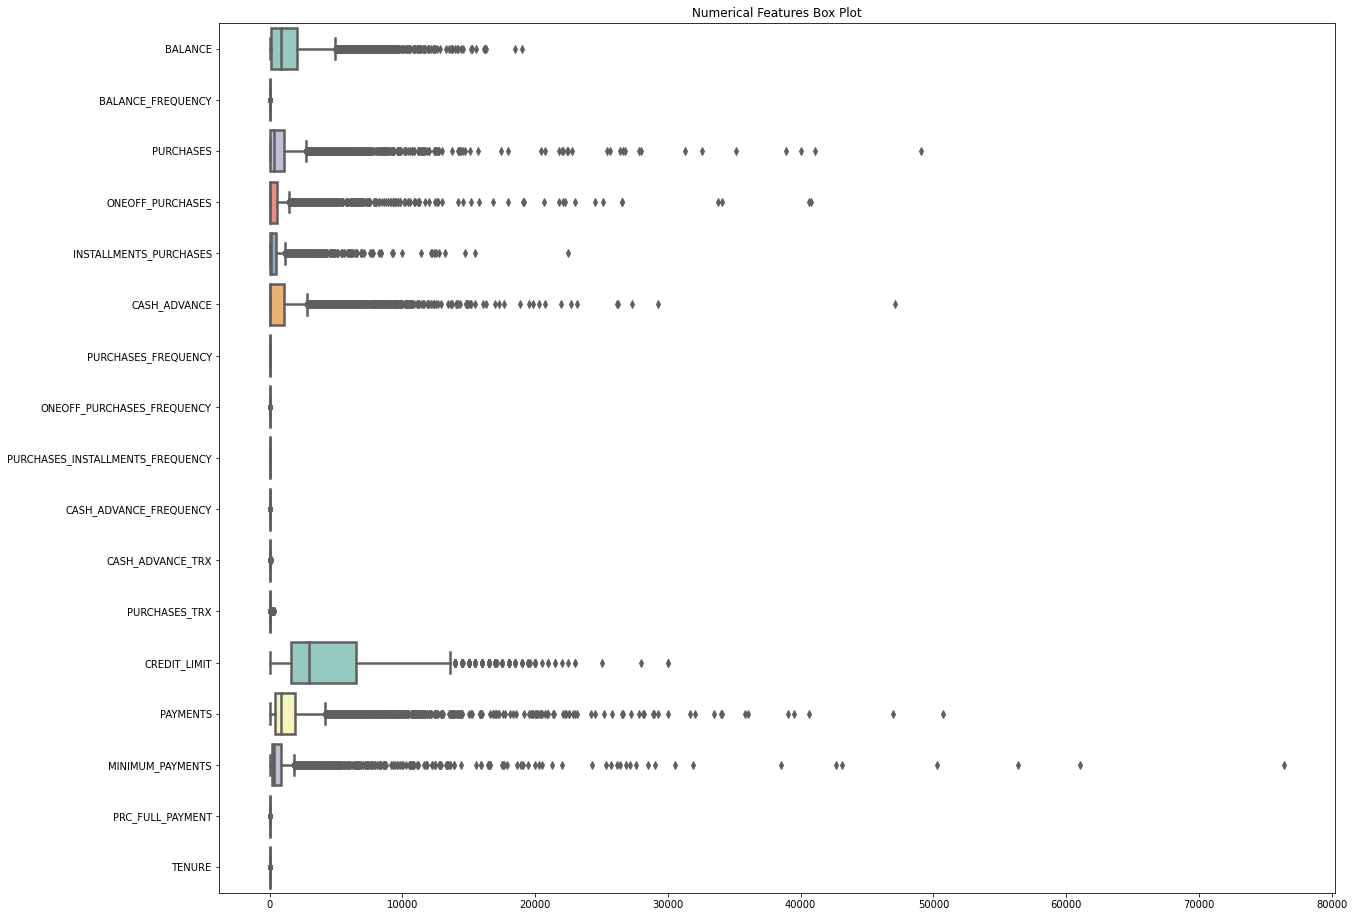

In [11]:
#detect outliers using boxplot
cat_col = cc.select_dtypes(include=['object']).columns
num_col = cc.select_dtypes(exclude=['object']).columns
plt.figure(figsize = (20,16))
sns.boxplot(data = cc[num_col], orient = 'h', palette = 'Set3', linewidth = 2.5 )
plt.title("Numerical Features Box Plot")

Our Numerical features contains outliers according to boxplot.

### Data Preprocessing

In [12]:
## Impute the missing values using KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_cc = pd.DataFrame(imputer.fit_transform(cc[num_col]),columns=cc[num_col].columns)
imp_cc.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
## Treat Outliers using IQR method
def removeoutliers(df=None, columns=None):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        floor, ceil = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df[column] = df[column].clip(floor, ceil)
        print(f"The columnn: {column}, has been treated for outliers.\n")
    return df
cc_final = removeoutliers(imp_cc,num_col)

The columnn: BALANCE, has been treated for outliers.

The columnn: BALANCE_FREQUENCY, has been treated for outliers.

The columnn: PURCHASES, has been treated for outliers.

The columnn: ONEOFF_PURCHASES, has been treated for outliers.

The columnn: INSTALLMENTS_PURCHASES, has been treated for outliers.

The columnn: CASH_ADVANCE, has been treated for outliers.

The columnn: PURCHASES_FREQUENCY, has been treated for outliers.

The columnn: ONEOFF_PURCHASES_FREQUENCY, has been treated for outliers.

The columnn: PURCHASES_INSTALLMENTS_FREQUENCY, has been treated for outliers.

The columnn: CASH_ADVANCE_FREQUENCY, has been treated for outliers.

The columnn: CASH_ADVANCE_TRX, has been treated for outliers.

The columnn: PURCHASES_TRX, has been treated for outliers.

The columnn: CREDIT_LIMIT, has been treated for outliers.

The columnn: PAYMENTS, has been treated for outliers.

The columnn: MINIMUM_PAYMENTS, has been treated for outliers.

The columnn: PRC_FULL_PAYMENT, has been treated 

Text(0.5, 1.0, 'Numerical Features Box Plot')

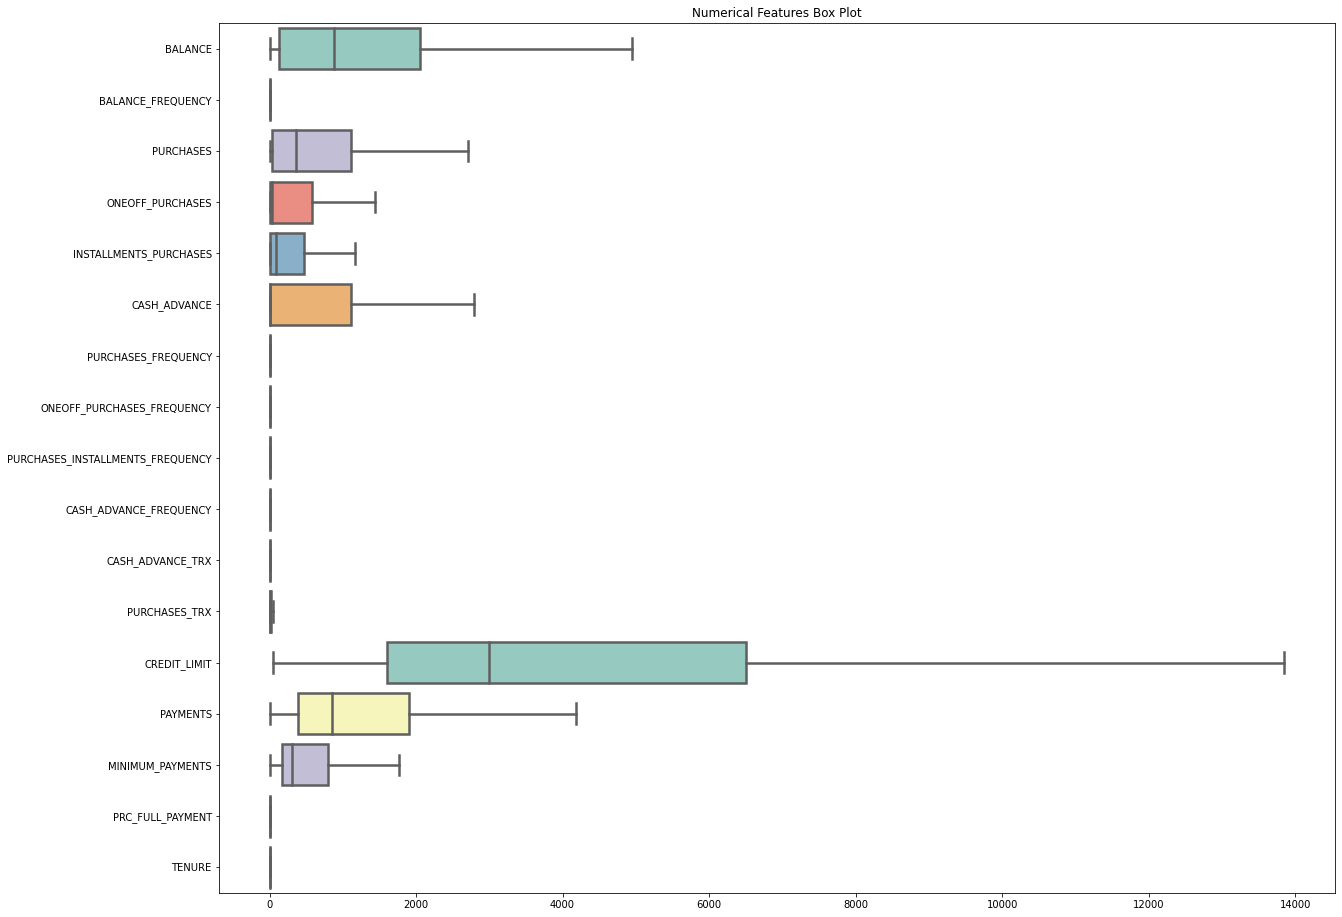

In [14]:
plt.figure(figsize = (20,16))
sns.boxplot(data = cc_final[num_col], orient = 'h', palette = 'Set3', linewidth = 2.5 )
plt.title("Numerical Features Box Plot")

### Exploratory Data Analysis 

In [15]:
cc_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [16]:
cc_final.shape

(8950, 17)

In [17]:
cc_final.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1390.508973,0.931587,737.149330,354.358139,295.546214,672.468924,0.490351,0.184773,0.364437,0.126061,2.383128,11.623799,4419.034428,1347.084165,562.052877,0.087223,12.0
std,1537.538479,0.110984,879.534788,511.823289,396.181546,998.514970,0.401371,0.255668,0.397448,0.172676,3.417878,13.041645,3383.845734,1272.806272,548.531109,0.138616,0.0
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,166.310858,0.000000,12.0
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,300.956126,0.000000,12.0
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,804.414788,0.142857,12.0
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4177.921543,1761.570683,0.357143,12.0


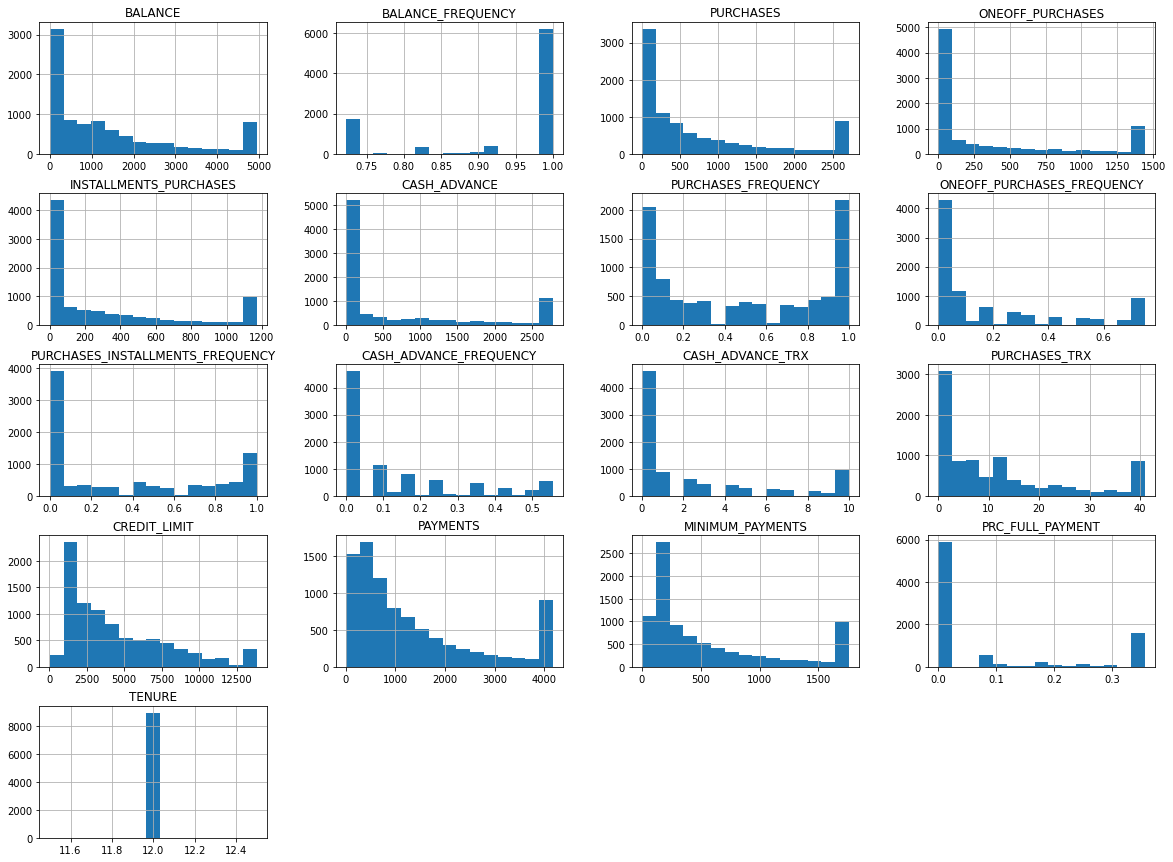

In [18]:
#view the distribution of num columns using histogram
cc_final.hist(bins=15, figsize=(20, 15), layout=(5, 4));

Our columns have skewed distribution

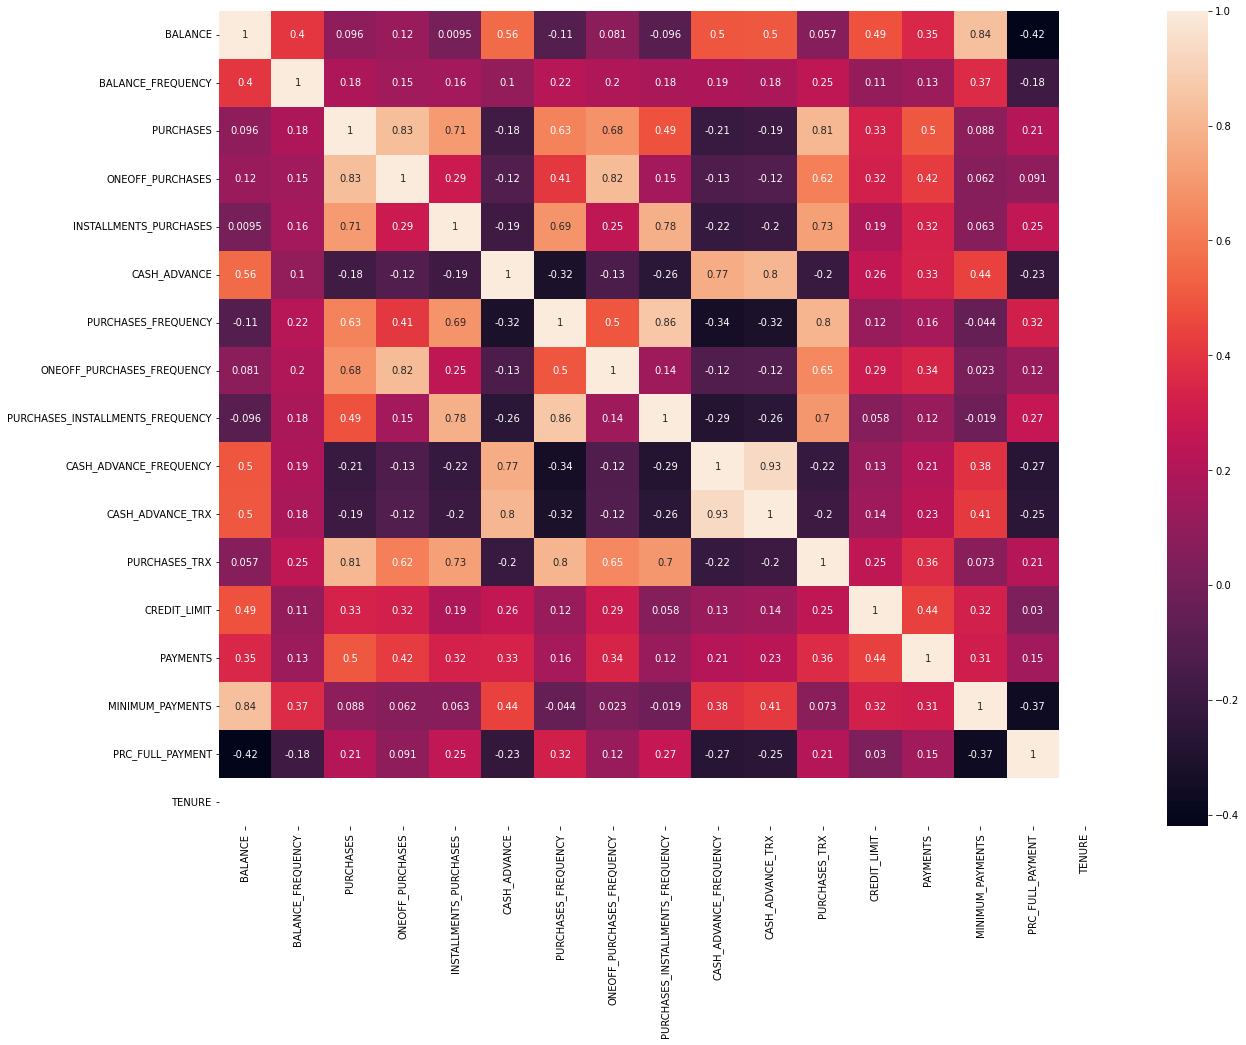

In [19]:
## Check for correlation
plt.subplots(figsize=(20,15))
sns.heatmap(cc_final[num_col].corr(),annot = True);

### Preparing the Model

In [20]:
## standardized the numerical features
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(cc_final.iloc[:,1:])
cc_std = pd.DataFrame(scaled_data,columns = cc_final.columns[1:])

In [21]:
cc_std.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010455,-0.899859,-0.770360,-0.629277,0.0
1,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762774,2.165375,0.930332,0.973961,0.0
2,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910543,-0.569653,0.118928,-0.629277,0.0
3,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910543,-1.058417,-0.332220,-0.629277,0.0
4,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951348,-0.525443,-0.578416,-0.629277,0.0


#### Elbow Method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The elbow method plots the value of the cost function (inertia) produced by different values for the number of clusters. The elbow of the curve indicates the point that we should stop dividing the data into further clusters.  


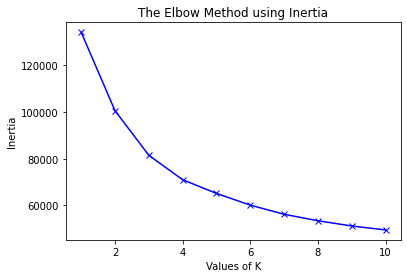

In [22]:
from sklearn.cluster import KMeans
inertias  = []
K = range(1,11)
for k in K:
    Kmeansmodel = KMeans(n_clusters=k, random_state=12345).fit(cc_std)
    inertias.append(Kmeansmodel.inertia_)
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From the elbow plot, we can see that the optimum number of clusters for this particular dataset is 4.

In [23]:
n_clusters = 4

### Building the models 

#### K-means Clustering

In [24]:
kmeans = KMeans(n_clusters = 4, random_state = 12345).fit(cc_std)
kmeans_labels = kmeans.labels_

In [25]:
labels_dict = {}
labels_dict["K-Means"] = kmeans_labels

In [26]:
kmeans.cluster_centers_

array([[-0.4052311 , -0.5300442 , -0.2822145 , -0.61166973, -0.36690286,
        -0.71018543, -0.27948264, -0.69994077, -0.31777201, -0.37000804,
        -0.63229381, -0.35000687, -0.48106454, -0.33674283, -0.24740165,
         0.        ],
       [ 0.06031508, -0.01410286, -0.50593459,  0.66254847, -0.54858698,
         0.95041504, -0.45385038,  1.12268958, -0.5733369 , -0.5572458 ,
         0.32372083, -0.35998171, -0.37777043, -0.29924137,  0.50070525,
         0.        ],
       [ 0.26538277, -0.55572658, -0.39825031, -0.52839872,  1.47704068,
        -0.7231943 , -0.38526942, -0.61814718,  1.45267821,  1.51174888,
        -0.59204136,  0.37636547,  0.43180596,  0.7692051 , -0.3960755 ,
         0.        ],
       [ 0.421213  ,  1.66699811,  1.61472873,  0.96276755, -0.2480219 ,
         1.01649687,  1.53088346,  0.66791048, -0.28629086, -0.26981274,
         1.49069511,  0.70787623,  0.92372746,  0.17145369,  0.30519817,
         0.        ]])

In [27]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [cc_std.columns])
cluster_centers

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.405231,-0.530044,-0.282215,-0.611670,-0.366903,-0.710185,-0.279483,-0.699941,-0.317772,-0.370008,-0.632294,-0.350007,-0.481065,-0.336743,-0.247402,0.0
1,0.060315,-0.014103,-0.505935,0.662548,-0.548587,0.950415,-0.453850,1.122690,-0.573337,-0.557246,0.323721,-0.359982,-0.377770,-0.299241,0.500705,0.0
2,0.265383,-0.555727,-0.398250,-0.528399,1.477041,-0.723194,-0.385269,-0.618147,1.452678,1.511749,-0.592041,0.376365,0.431806,0.769205,-0.396075,0.0
3,0.421213,1.666998,1.614729,0.962768,-0.248022,1.016497,1.530883,0.667910,-0.286291,-0.269813,1.490695,0.707876,0.923727,0.171454,0.305198,0.0


In [28]:
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [cc_std.columns])
cluster_centers

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.886616,270.983063,209.922253,53.227492,306.131397,0.205319,0.113323,0.086263,0.071193,1.118557,3.378108,3234.731334,734.816414,377.349280,0.052931,12.0
1,0.938281,724.746068,95.423500,558.021028,124.727215,0.871798,0.068745,0.810623,0.027065,0.478637,15.845415,3200.979914,866.282456,397.918848,0.156625,12.0
2,0.961038,248.395778,150.535745,86.216088,2147.233762,0.200098,0.086278,0.118770,0.376890,7.549814,3.903037,5692.525952,1896.658796,983.962230,0.032324,12.0
3,0.978332,2203.250250,1180.767736,676.955640,424.829177,0.898320,0.576149,0.629882,0.076628,1.460993,31.063830,6814.244573,2522.744579,656.095305,0.129526,12.0


In [29]:
cc_kmeans_clusters = pd.concat([cc_final, pd.DataFrame({'cluster': kmeans_labels})], axis = 1)
cc_kmeans_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0


#### Agglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
agg_complete  = AgglomerativeClustering(n_clusters=4,linkage = 'complete').fit(cc_std)
complete_labels = agg_complete.labels_
complete_labels

array([2, 0, 0, ..., 2, 2, 2], dtype=int64)

In [31]:
labels_dict["Agglomerative Complete"] = complete_labels

### Evaluating the models

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
for keys, values in labels_dict.items():
    print("Clustering Algorithm: ", keys)
    ss = silhouette_score(cc_std,labels = values,metric = 'euclidean')
    print("Silhouette Score: ", np.round(ss, decimals=3))

Clustering Algorithm:  K-Means
Silhouette Score:  0.216
Clustering Algorithm:  Agglomerative Complete
Silhouette Score:  0.172


### Plotting using PCA

In [34]:
from sklearn.decomposition import PCA

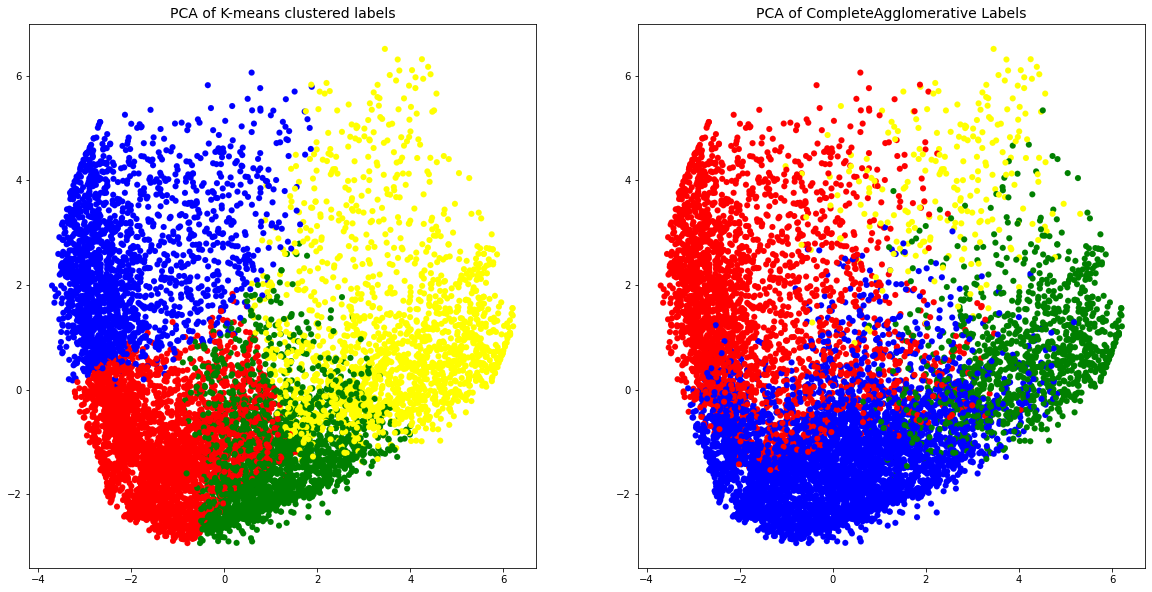

In [35]:
pca_2d = PCA(n_components=2).fit_transform(cc_std)
fig = plt.figure(figsize=(20,10))
ax1, ax2 = fig.subplots(1, 2)

##1 pricipal components using Kmeans Clustering
label_color_dict = {0:'red',1:'green',2:'blue',3:'yellow'}
cvec = [label_color_dict[label] for label in kmeans_labels]
ax1.scatter(x=pca_2d[:, 0], y=pca_2d[:, 1], color=cvec,lw=0.1)
ax1.set_title('PCA of K-means clustered labels',fontsize = 14)

##2 pricipal components using Agglomerative Complete Clustering
label_color_dict = {0:'red',1:'green',2:'blue',3:'yellow'}
cvec = [label_color_dict[label] for label in complete_labels]
ax2.scatter(x=pca_2d[:, 0], y=pca_2d[:, 1], color=cvec,lw=0.1)
ax2.set_title('PCA of CompleteAgglomerative Labels',fontsize = 14)

fig.savefig('CreditCard.png')